<a href="https://colab.research.google.com/github/CuadraAlconero/IDAL_IA3_CuadraAlconero/blob/main/keras_custom_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

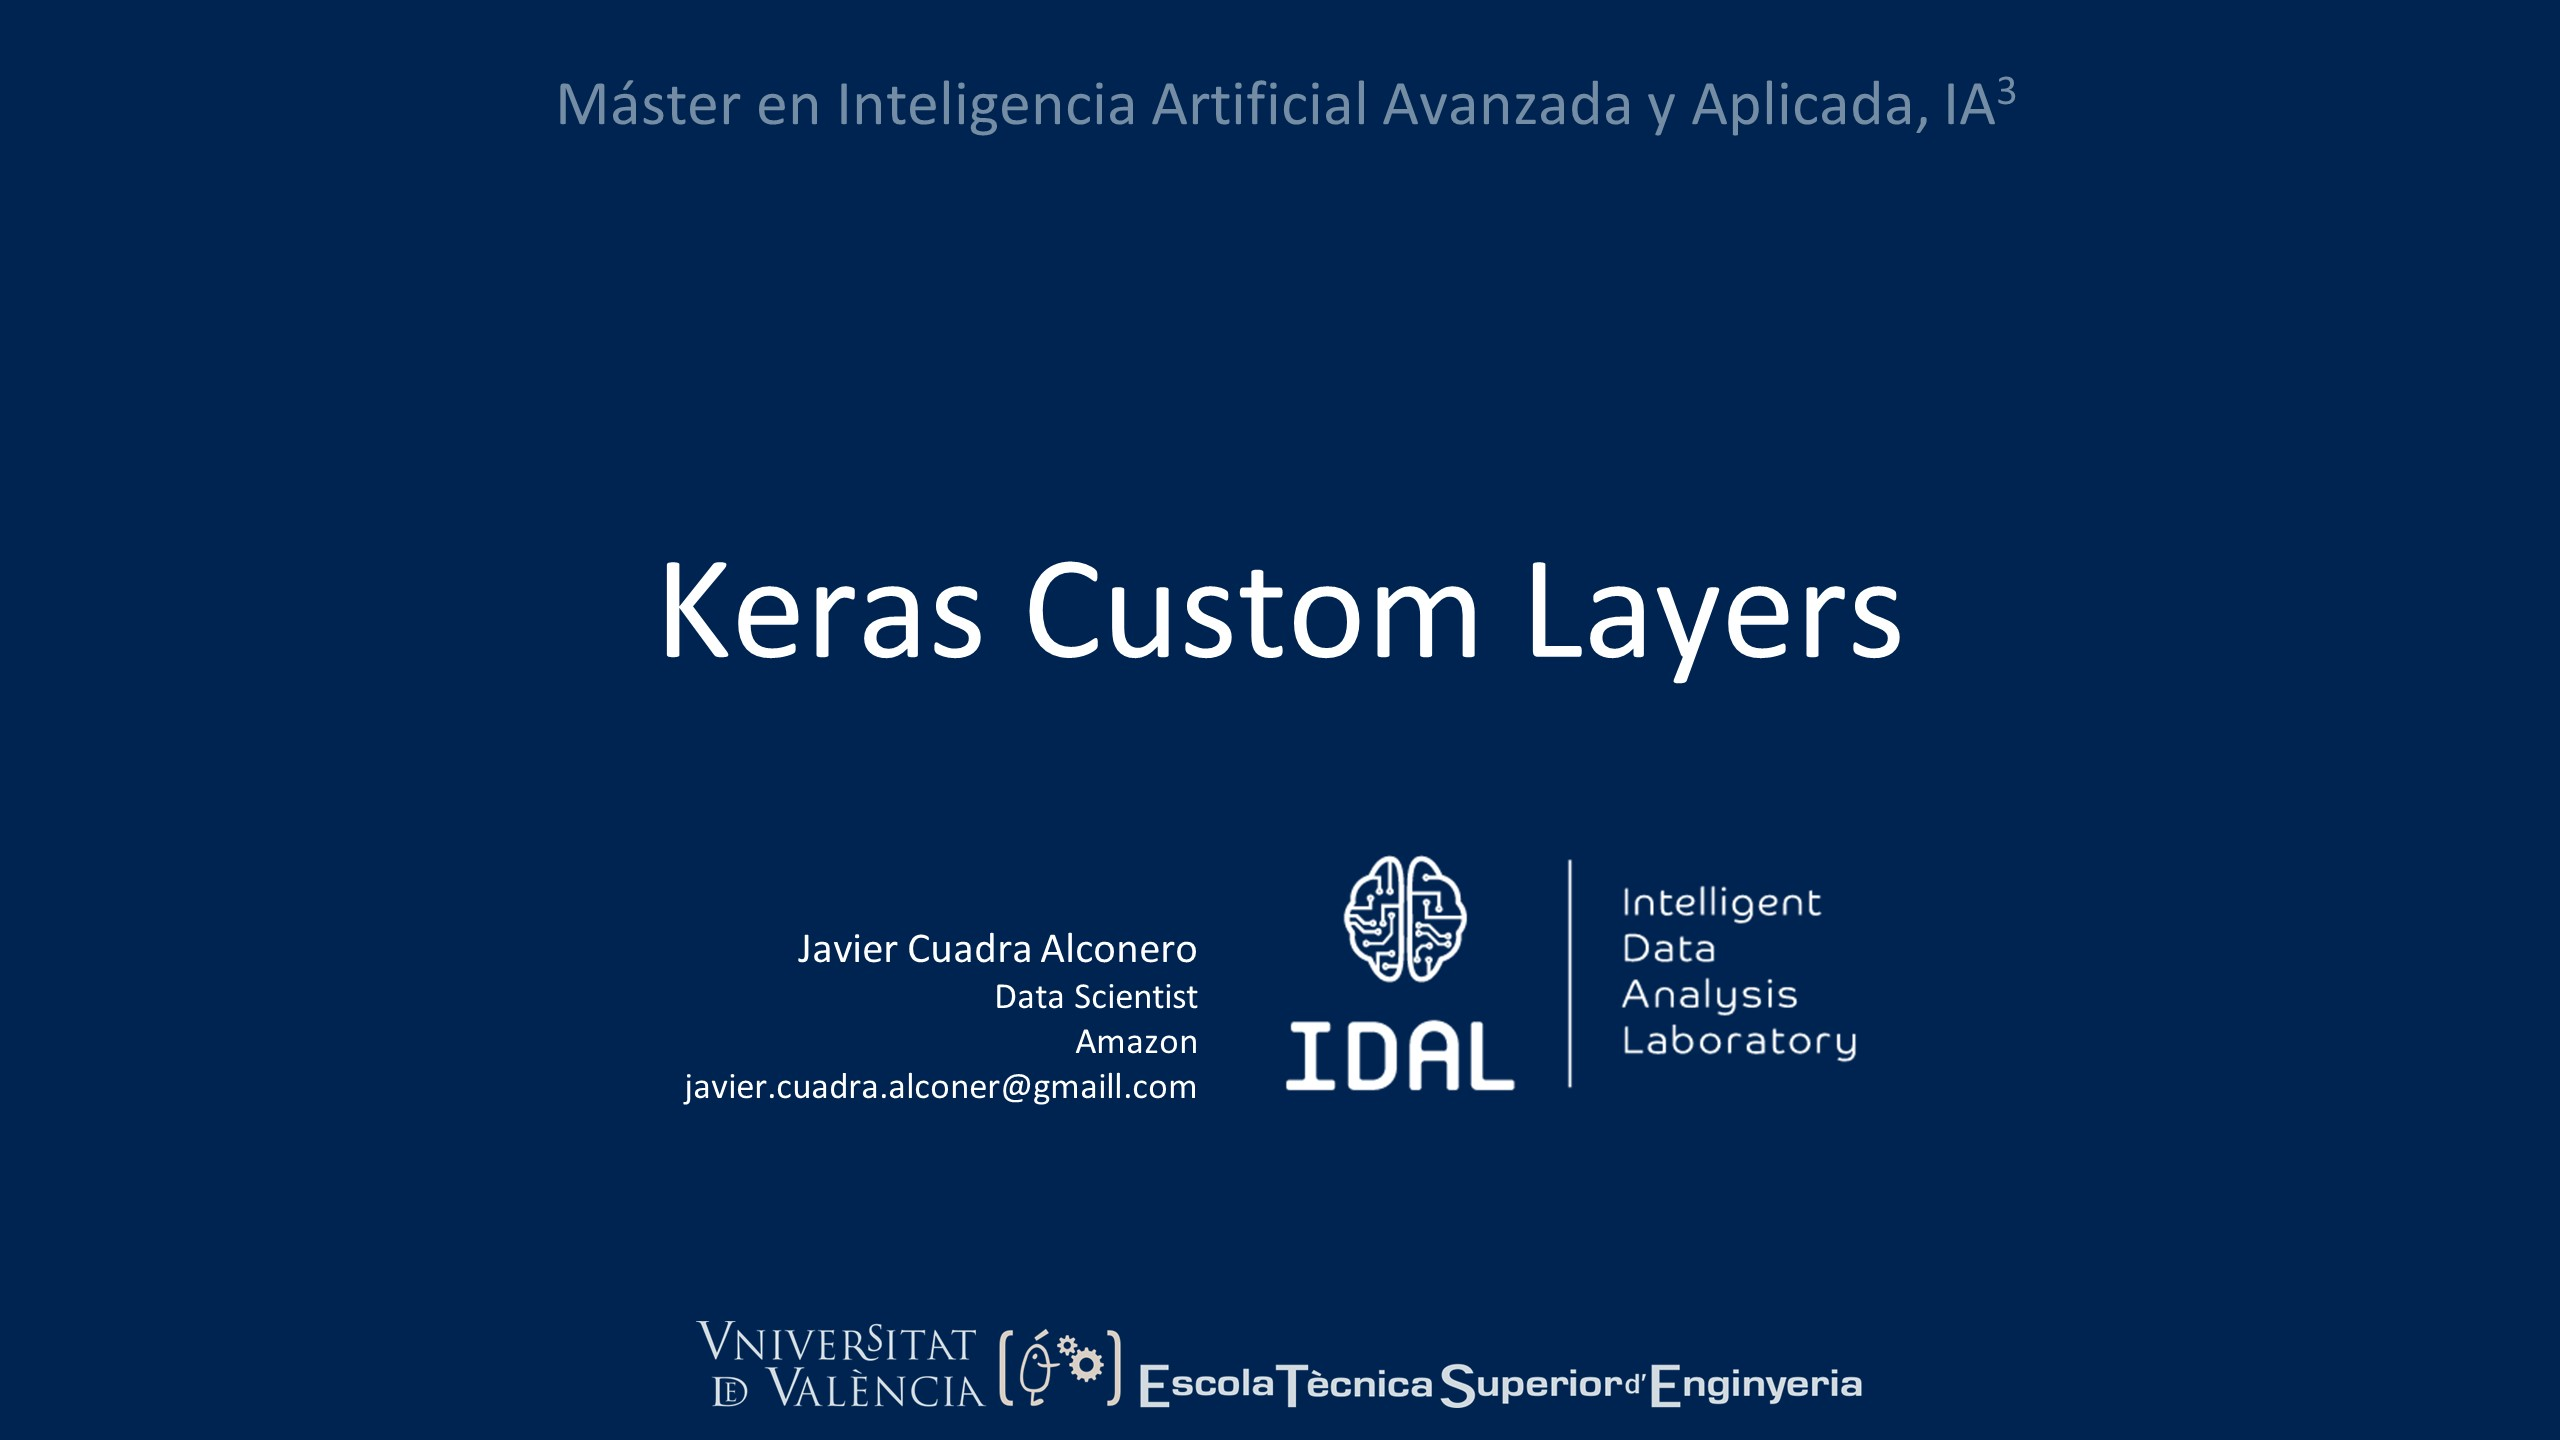

Es común que cualquier framework de Deep Learning posea una serie de operaciones preimplementadas que permitan trabajar y lanzar experimentos. Sin embargo, la comunidad pronto necesitará de desarrollar nuevas herramientas para lanzar experimentos y resolver problemas que actualmente no cuentan con una solución. A la hora de implementar una nueva idea en Keras es necesario construir una capa "custom".

Una capa custom en Keras debe cumplir los siguientes requisitos.

- Se trata de una clase construída en Python.
- Debe poseer la clase Layer de keras como clase padre.
- Debe poseer un constructor y el método call.

La documentación oficial puede encontrarse aquí: https://keras.io/guides/making_new_layers_and_models_via_subclassing/

Como estudiamos al principio del curso el constructor de una clase contiene los atributos necesarios para instanciarla. Por otro lado el método call contiene la lógica de la operación que se realizará cada vez que la capa sea llamada al recibir una entrada (tanto los inputs de una red de neuronas como las salidas de una capa anterior).

Además es importante que todas las variables y operaciones que defináis se generen con el framework de tensorflow. Quitando algunas particularidades, el framework de tensorflow opera de forma muy similar a numpy, por lo tanto es importante que adquiráis habilidades con esta librería si queréis diseñar vuestros propios experimentos.



## Resumen de Tensorflow

Algunos de los métodos más utilizados en tensorflow son:

- tf.Variable - Permite crear una variable y definir si es entrenable o no.
- tf.matmul - Permite realizar multiplicaciones matriciales
- tf.tensordot - Permite realizar el dot product de dos variables
- tf.einsum - Permite realizar definir productos entre tensores
- tf.math.sigmoid - Permite computar la función de activación sigmoide
- tf.math.tanh - Permite computar la función de activación tangente hiperbólica
- tf.nn.relu - Permite comptuar la función de activación relu
- tf.nn.softmax - Permite computar un clasificador softmax

# Ejemplo construcción de capa linear

In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np

In [2]:
class LinearLayer(keras.layers.Layer):
  def __init__(self, units, input_shape):
    super(LinearLayer, self).__init__()
    init_weights = tf.random_normal_initializer()
    self.W = tf.Variable(init_weights(shape=(input_shape, units)), 
                         trainable=True, 
                         dtype=np.float32)
    
  def call(self, inputs):
    x = tf.matmul(inputs, self.W)
    return x

In [3]:
# Generamos un conjunto de datos
batch = 100
input_dim = 30
dataset = np.random.normal(size=(batch, input_dim))
labels = np.random.normal(size=batch)
dataset = dataset.astype(np.float32)

In [4]:
ll = LinearLayer(40, 30)
results = ll.call(dataset)
results.shape

TensorShape([100, 40])

# Análisis Dimensional

Es común al operar con grandes matrices y tensores perdernos entre las altas dimensiones con las que estamos trabajando. Un ejercicio que os ahorrará grandes dolores de cabeza es realizar un análisis dimensional tanto de vuestros resultados como de los resultados intermedios.

El análisis dimensional hace referencia a comprobar que las dimensiones del tensor con el que estáis trabajando mantiene la forma correcta tras realizar las distintas operaciones matriciales/tensoriales.

En este caso estamos operando dos matrices con las siguientes dimensiones:

$ [batch size, input dim] * [input dim, units] = [batch size, units]$

El resultado que esperamos es una matriz con número de filas igual al tamaño del batch y número de columnas igual a las unidades. Es importante que realicéis el análisis dimensional previamente a construir la capa para evitar sesgos. Comprobemos si nuestra capa lineal cumple en efecto las dimensiones deseadas en su resultado.

In [6]:
print(f"Dim 0 of results: {results.shape[0]}")
print(f"Dim 1 of results: {results.shape[1]}")

Dim 0 of results: 100
Dim 1 of results: 40


En efecto el resultado obtenido es el deseado, pues mantenemos la dimensión del batch y el número de unidades como dimensiones 0 y 1 respectivamente. Un análisis dimensional es un buen indicador de que en efecto las operaciones realizadas son correctas, aún así, en ningún caso significa que en efecto el resultado sea el esperado.

# Construcción de modelo con capa linear



In [8]:
input_layer = keras.layers.Input(shape=30)
linear = LinearLayer(40, 30)(input_layer)
output = keras.layers.Dense(1, activation=None)(linear)

model = keras.Model(inputs=input_layer, outputs=output)
model.compile(optimizer="Adam", loss="mse")
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
linear_layer_2 (LinearLayer) (None, 40)                1200      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 1,241
Trainable params: 1,241
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(dataset, labels, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 1.5334
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 1.3361
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1827
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1509
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1893
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0977
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9058
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9766
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0204
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0068
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9685
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9012
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

In [10]:
# Realizamos también análisis dimensional de las predicciones
prediction = model.predict(dataset)
prediction.shape

(100, 1)

# Ejercicio

Construid una capa personalizada que realice una multiplicación matricial por un conjunto de pesos de dimensión (units, input_shape) sume un vector de pesos para el bias y active el resultado con una función sigmoide, tangente hiperbólica o relu.

Integradla en un modelo y realizad un entrenamiento y una predicción.

In [27]:
class SigmoidLayer(keras.layers.Layer):
  def __init__(self, units, input_shape):
    super(SigmoidLayer, self).__init__()
    init_weights = tf.random_normal_initializer()
    self.W = tf.Variable(init_weights(shape=(input_shape, units)), 
                         trainable=True, 
                         dtype=np.float32)
    self.b = tf.Variable(init_weights(shape=(1, 40)),
                         trainable=True,
                         dtype=np.float32)
    
  def call(self, inputs):
    x = tf.matmul(inputs, self.W)
    x = tf.math.add(x, self.b)
    sigm = tf.math.sigmoid(x)
    return sigm

In [28]:
ll = SigmoidLayer(40, 30)
results = ll.call(dataset)
results.shape

TensorShape([100, 40])

In [31]:
input_layer = keras.layers.Input(shape=30)
linear = SigmoidLayer(40, 30)(input_layer)
output = keras.layers.Dense(1, activation=None)(linear)

model = keras.Model(inputs=input_layer, outputs=output)
model.compile(optimizer="Adam", loss="mse")
model.summary()
model.fit(dataset, labels, epochs=10)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
sigmoid_layer_3 (SigmoidLaye (None, 40)                1240      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 41        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
4/4 [==============================] - 0s 4ms/step - loss: 1.8067
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 1.7788
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 1.5435
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 1.3739
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 1.2347
Ep

In [32]:
prediction = model.predict(dataset)
prediction.shape

(100, 1)

# Capas sin dimensiones de entrada

Como hemos comentado en el capítulo anterior es posible construir una capa únicamente con un constructor y el método call. Sin embargo, los usuarios de Keras os habréis percatado de que es necesario pasar las dimensiones de entrada como parámetro a nuestra capa personalizada. 

Es posible construir una capa que obtenga las dimensiones de entrada de la capa anterior utilizando el método build. El método build inicializa los pesos de la capa de forma tardía al recibir las dimensiones de entrada como parámetro de la capa anterior. Veamos un ejemplo.

In [33]:
class LinearLayer(keras.layers.Layer):
  def __init__(self, units):
    super(LinearLayer, self).__init__()
    self.units = units
  
  def build(self, input_shape):
    init_weights = tf.random_normal_initializer()
    self.W = tf.Variable(init_weights(shape=(input_shape[-1], self.units)), 
                         trainable=True, 
                         dtype=np.float32)
    
  def call(self, inputs):
    x = tf.matmul(inputs, self.W)
    return x

In [34]:
input_layer = keras.layers.Input(shape=30)
linear = LinearLayer(40)(input_layer)
output = keras.layers.Dense(1, activation=None)(linear)

model = keras.Model(inputs=input_layer, outputs=output)
model.compile(optimizer="Adam", loss="mse")
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
linear_layer_9 (LinearLayer) (None, 40)                1200      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 41        
Total params: 1,241
Trainable params: 1,241
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(dataset, labels, batch_size=100, epochs=100, verbose=0)

# Ejercicio

Adaptad vuestra capa anterior con un método build y volved a ejectuad vuestro modelo.

# Ejercicio 2

Construid un clasificador de redes de neuronas usando únicamente capas custom.

- Una capa densa con activación tanh
- Una segunda capa densa con activación tanh
- Un clasificador softmax

In [37]:
# Ejercicio

class SigmoidLayer(keras.layers.Layer):
  def __init__(self, units):
    super(SigmoidLayer, self).__init__()
    init_weights = tf.random_normal_initializer()
    self.b = tf.Variable(init_weights(shape=(1, 40)),
                         trainable=True,
                         dtype=np.float32)
    
  def build(self, input_shape):
    self.W = tf.Variable(init_weights(shape=(input_shape[-1], units)), 
                         trainable=True, 
                         dtype=np.float32)

  def call(self, inputs):
    x = tf.matmul(inputs, self.W)
    x = tf.math.add(x, self.b)
    sigm = tf.math.sigmoid(x)
    return sigm

input_layer = keras.layers.Input(shape=30)
linear = LinearLayer(40)(input_layer)
output = keras.layers.Dense(1, activation=None)(linear)

model = keras.Model(inputs=input_layer, outputs=output)
model.compile(optimizer="Adam", loss="mse")
model.summary()

model.fit(dataset, labels, batch_size=100, epochs=10, verbose=1)

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
linear_layer_11 (LinearLayer (None, 40)                1200      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 41        
Total params: 1,241
Trainable params: 1,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 0s 427ms/step - loss: 1.5585
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 1.4938
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 1.4339
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 1.3784
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 1.3268


In [42]:
# Dataset para el ejercicio 2
import sklearn.datasets as skd
dataset = skd.load_iris()

dataset["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])